In [1]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 5.3 MB/s 


In [2]:
# from facenet_pytorch import MTCNN, InceptionResnetV1, fixed_image_standardization, training
from mtcnn.mtcnn import MTCNN
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader, SubsetRandomSampler
from torch import optim
from torch.optim.lr_scheduler import MultiStepLR
from torch.utils.tensorboard import SummaryWriter
import numpy as np
from PIL import Image
import cv2
import time
import os
from google.colab.patches import cv2_imshow

In [8]:
img = cv2.imread('/content/drive/MyDrive/test/4.jpg')
# img2 = cv2.resize(img,(160,160))
mtcnn = MTCNN()

In [11]:
img.shape

(600, 800, 3)

In [12]:
faces = mtcnn.detect_faces(img)

1/1 [==============================] - 0s 49ms/step


In [13]:
faces

[{'box': [451, 47, 127, 152],
  'confidence': 0.9999803900718689,
  'keypoints': {'left_eye': (495, 100),
   'right_eye': (547, 123),
   'nose': (511, 145),
   'mouth_left': (472, 151),
   'mouth_right': (520, 173)}},
 {'box': [231, 233, 119, 153],
  'confidence': 0.9999793767929077,
  'keypoints': {'left_eye': (264, 292),
   'right_eye': (320, 297),
   'nose': (287, 330),
   'mouth_left': (257, 340),
   'mouth_right': (317, 348)}},
 {'box': [329, 368, 161, 215],
  'confidence': 0.9999615550041199,
  'keypoints': {'left_eye': (362, 449),
   'right_eye': (432, 444),
   'nose': (387, 492),
   'mouth_left': (368, 522),
   'mouth_right': (439, 518)}},
 {'box': [73, 197, 161, 220],
  'confidence': 0.9996165633201599,
  'keypoints': {'left_eye': (126, 274),
   'right_eye': (199, 286),
   'nose': (162, 318),
   'mouth_left': (116, 354),
   'mouth_right': (182, 364)}},
 {'box': [309, 71, 134, 173],
  'confidence': 0.9995211958885193,
  'keypoints': {'left_eye': (346, 137),
   'right_eye': (407

In [14]:
boxes = []
for i in range(len(faces)):
  boxes.append(faces[i]['box'])

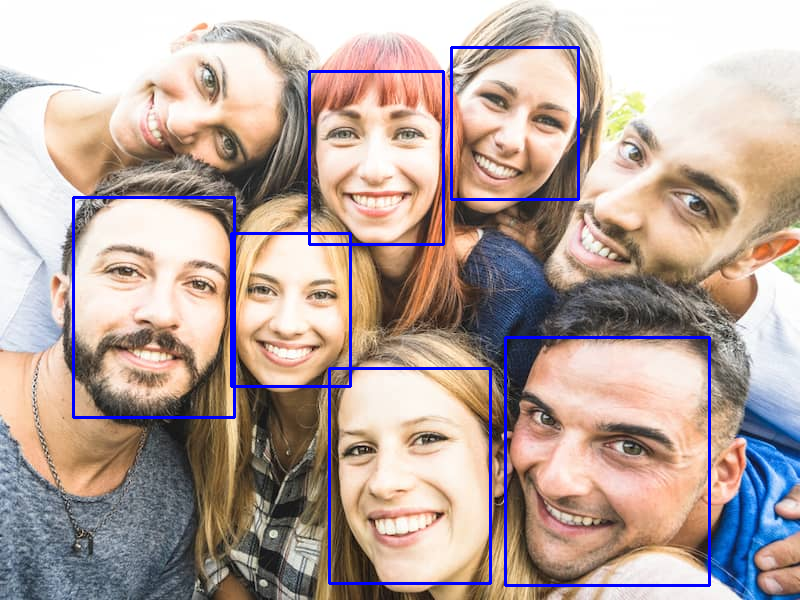

In [15]:
for (x, y, w, h) in boxes:
    cv2.rectangle(img, (int(x), int(y)), (int(x)+int(w), int(y)+int(h)), (255, 0, 0), 2)

cv2_imshow(img)

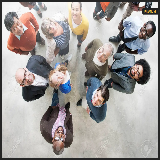

In [ ]:
cv2_imshow(img2)

In [ ]:
!pip install mtcnn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.3 MB 26.8 MB/s 


In [ ]:
from mtcnn.mtcnn import MTCNN
import os
import cv2

In [ ]:
def mtcnn_detect(frame):
    mtcnn = MTCNN()
    boxes = []
    detector = mtcnn.detect_faces(frame)
    for i in range(len(detector)):
        boxes.append(detector[i]['box'])
    return boxes

In [ ]:
def crop_photos():
    folder = '/content/drive/MyDrive/photos'
    savefolder = '/content'
    for filename in os.listdir(folder):
        indfolder = folder + "/" + filename
        indsavefolder = savefolder + "/" + filename
        for fname in os.listdir(indfolder):
            opencv_image = cv2.imread(os.path.join(indfolder, fname))
            if opencv_image is not None:
                # tensor,box,cropped_arr = yoloface(opencv_image,isvideo=False)
                box = mtcnn_detect(opencv_image)
                # for i in range(len(box)):
                i = 0
                cropped = opencv_image[int(box[i][1]):int(
                        box[i][1])+int(box[i][3]), int(box[i][0]):int(box[i][0])+int(box[i][2])]
                cv2_imshow(cropped)
                    # cropped = cropped_arr[i]
                    # print(cropped.shape)
                    # resize to (160,160)
                    # cropped = cv2.resize(cropped, (160, 160))
                    # if not os.path.exists(indsavefolder):
                    #     os.makedirs(indsavefolder)
                    # finalpath = indsavefolder + "/" + fname + str(i) + ".jpg"
                    # cv2.imwrite(finalpath, cropped)

1/1 [==============================] - 0s 132ms/step


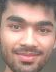

1/1 [==============================] - 0s 144ms/step


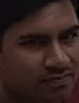

1/1 [==============================] - 0s 168ms/step


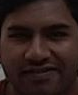

1/1 [==============================] - 0s 112ms/step


IndexError: ignored

In [ ]:
crop_photos()

In [ ]:
def make_rect(frame,box,name):
    x,y,w,h = box
    # cv2.rectangle(frame, (int(x), int(y) + int(h) - 35),
                                    # (int(x) + int(w), int(y) + int(h)), (0, 0, 255), cv2.FILLED)
    # font = cv2.FONT_HERSHEY_DUPLEX
    # cv2.putText(frame, name, (int(x) + 6, int(y) + int(h) - 6),
                                    # font, 1.0, (255, 255, 255), 1)

    cv2.rectangle(frame, (int(x), int(y)), (int(
                            x)+int(w), int(y)+int(h)), (255, 0, 0), 2)

In [ ]:
img = '/content/drive/MyDrive/photos/nema/WIN_20220923_16_37_46_Pro.jpg'
frame = cv2.imread(img)

In [ ]:
box = mtcnn_detect(frame)

In [ ]:
box

[[51, 26, 56, 72]]

In [ ]:
make_rect(frame,box[0],'nema')

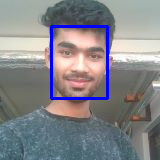

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(frame)

In [ ]:
!pip install yoloface

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for yoloface: filename=yoloface-0.0.4-py3-none-any.whl size=5984 sha256=7e5aaa57eb357f86d30390ee079662716750713301ff37766d60b814355aacb0
  Stored in directory: /root/.cache/pip/wheels/53/bd/2a/eb7a521c6b09e1710a7d4f712d9394b8b49ac9cbc0b2e4b5bb
Successfully built yoloface


In [ ]:
from yoloface import face_analysis
import os
import numpy as np
import cv2
import torchvision.transforms as transforms
import torch

In [ ]:
def yoloface(frame):
    face = face_analysis()
    transform = transforms.ToTensor()
    tensor = []
    img, box, conf = face.face_detection(
           frame_arr=frame, frame_status=True, model='full')

    if box is not None:
        try:
            for i in range(len(box)):
                cropped = frame[int(box[i][1]):int(
                        box[i][1])+int(box[i][3]), int(box[i][0]):int(box[i][0])+int(box[i][2])]
                cropped = cv2.resize(cropped, (160, 160))
                cropped = cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB)
                tensor.append(transform(cropped))
        except:
            pass
        box = switch_coordinates(box)
    return tensor, box

In [ ]:
img = '/content/drive/MyDrive/photos/nema/WIN_20220923_16_37_46_Pro.jpg'
frame = cv2.imread(img)

In [ ]:
tensor, box = yoloface(frame)

yolov3-tiny_face.weights:: status : file already exists
yolov3_tiny_face.cfg:: status : file already exists
face_detection.weights:: status : file already exists
face_detection.cfg:: status : file already exists


In [ ]:
box

[[38, 26, 68, 80]]

In [ ]:
frame.shape

(160, 160, 3)

In [ ]:
make_rect(frame,box[0],"nema")

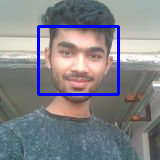

In [ ]:
cv2_imshow(frame)

In [ ]:
def switch_coordinates(boxes_arr):
  finallist = []
  for box in boxes_arr:
    temp = [box[0],box[1],box[3],box[2]]
    finallist.append(temp)
  return finallist

In [ ]:
test = [[1,2,3,4],[5,6,7,8]]
res = switch_coordinates(test)
res

[[1, 2, 4, 3], [5, 6, 8, 7]]

In [ ]:
box = switch_coordinates(box)